In [2]:
import random
import tqdm
import numpy as np
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

# get a llama tokenizer
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM-360M-Instruct")


def validate_dataset(dataset, n_samples=2000):
    n_tokens = []
    resolutions = []
    for _ in tqdm.tqdm(range(n_samples)):
        sample = dataset[random.randint(0, len(dataset)-1)]
        n_tokens.append(tokenizer.encode(sample['text'], return_tensors='pt').shape[-1])
        resolutions.append(np.array(sample['image'].size))

    resolutions = np.array(resolutions)
    print('Resolution:', resolutions.shape)

    plt.figure(figsize=(20, 5))
    plt.title('Average Tokens: {:.2f}'.format(sum(n_tokens) / len(n_tokens)))
    plt.hist(n_tokens, bins=500)
    plt.show()

    plt.figure(figsize=(20, 5))
    plt.title('Average Resolution ' + str(np.mean(resolutions, axis=0)))
    plt.hist(resolutions[:, 0], bins=200, label='Width')
    plt.hist(resolutions[:, 1], bins=200, label='Height')
    plt.show()


def visualize_sample(dataset, n_samples=5):
    print('Dataset size:', len(dataset))
    for i in range(n_samples):
        sample = dataset[random.randint(0, len(dataset)-1)]
        plt.imshow(sample['image'])
        plt.show()
        print(sample['text'])


/home/dchenbs/anaconda3/envs/subobjects_vlm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Total samples: 102025, using train split: 81620 (from 0 to 81620)
Total samples: 102025, after removing text-only samples: 81620
81620


100%|██████████| 2000/2000 [00:19<00:00, 100.32it/s]


Resolution: (2000, 2)


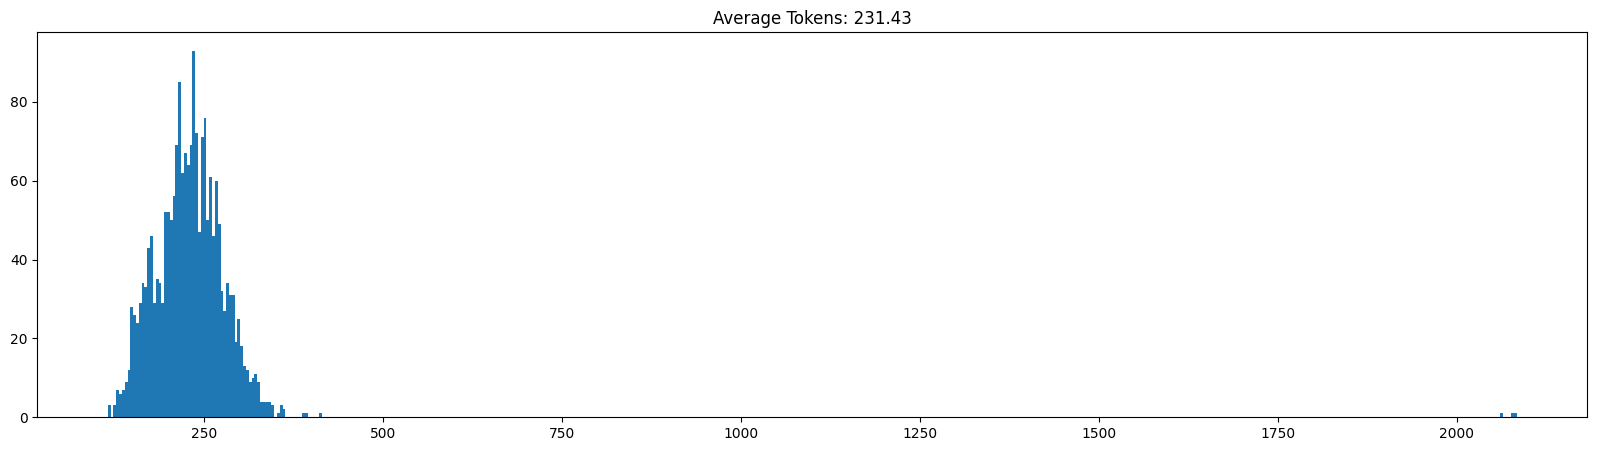

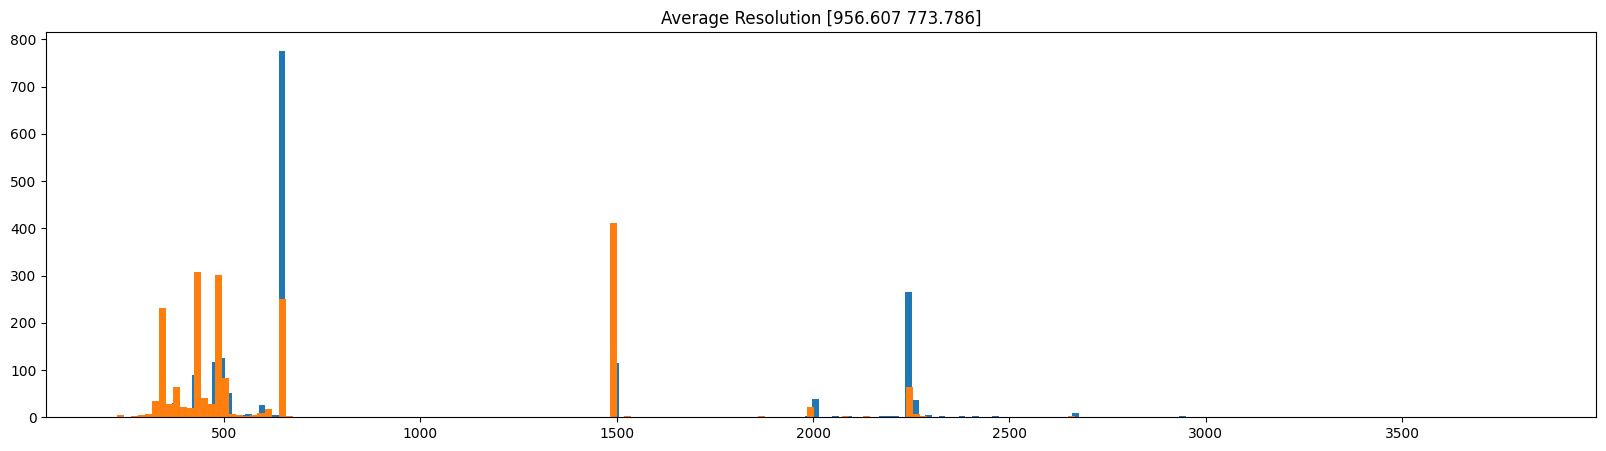

In [3]:

from data import (
    ShareGPT4V,
    ImageParagraphCaptioning,
    CLEVRCaption,
    ImageNet,
    CocoCaptionDataset
)

split = 'train'

# dataset = ShareGPT4V('/home/dchenbs/workspace/datasets/sharegpt4v/ShareGPT4V/sharegpt4v_mix665k_cap23k_coco-ap9k_lcs3k_sam9k_div2k.json', split=split)
# dataset = ShareGPT4V('/home/dchenbs/workspace/datasets/sharegpt4v/ShareGPT4V/share-captioner_coco_lcs_sam_1246k_1107.json', split=split)
dataset = ShareGPT4V('/home/dchenbs/workspace/datasets/sharegpt4v/ShareGPT4V/sharegpt4v_instruct_gpt4-vision_cap100k.json', split=split)

# dataset = CLEVRCaption(root='/home/dchenbs/workspace/datasets/CLEVR_v1.0', split=split)
# dataset = ImageParagraphCaptioning(root='/home/dchenbs/workspace/datasets/VisualGenome', split=split)
# dataset = ImageNet(root='/share/datasets/imagenet', split=split)
# dataset = CocoCaptionDataset(root='/share/datasets/coco2017', split=split)


print(len(dataset))
# visualize_sample(dataset, n_samples=5)
validate_dataset(dataset, n_samples=2000)